In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# import copy
# import numpy as np
# import xgboost as xgb
# import seaborn as sns
# from datetime import datetime
# Set up for visualizations
# %matplotlib inline
# sns.set(style="whitegrid")


In [4]:
# Load data
dataset = "dataset_2012-24"
con = sqlite3.connect("../../Data/dataset.sqlite")
data = pd.read_sql_query(f"select * from \"{dataset}\"", con, index_col="index")
con.close()

# margin = data['Home-Team-Win']
# data.drop(['Score', 'Home-Team-Win', 'TEAM_NAME', 'Date', 'TEAM_NAME.1', 'Date.1', 'OU-Cover', 'OU'],
#           axis=1, inplace=True)

# Prepare your data for visualization (adapt according to your data structure)
# This might include creating DataFrames from your predictions, odds, and other outputs
# Example:
# data_for_visualization = pd.DataFrame(your_data_array)


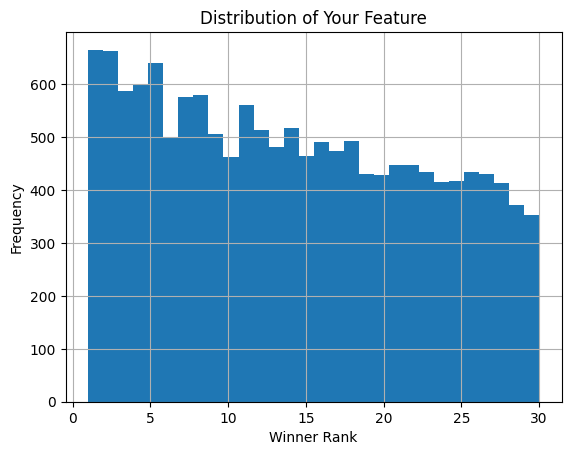

In [5]:
# Histogram of a single feature

data['W_RANK'].hist(bins=30)
plt.xlabel('Winner Rank')
plt.ylabel('Frequency')
plt.title('Distribution of Your Feature')
plt.show()

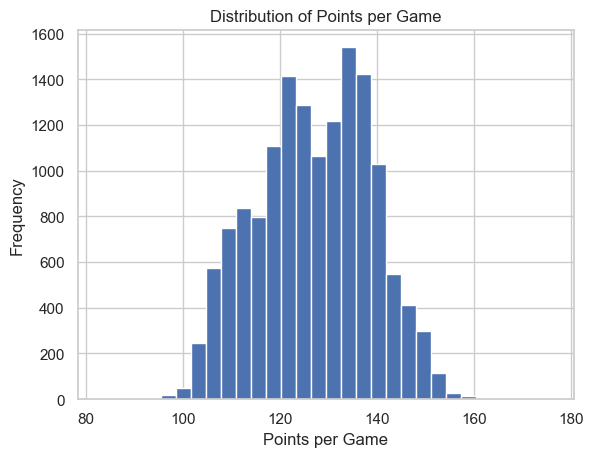

In [10]:
data['PPG'] = data['FGM'] * 2 + data['FG3M'] * 3 + data['FTM']  # Assuming 2 points for FGM and 3 for FG3M
data['PPG'].hist(bins=30)
plt.xlabel('Points per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Points per Game')
plt.show()


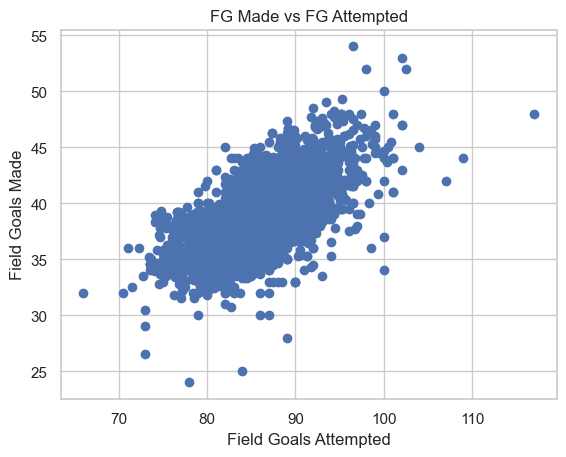

In [11]:
plt.scatter(data['FGA'], data['FGM'])
plt.xlabel('Field Goals Attempted')
plt.ylabel('Field Goals Made')
plt.title('FG Made vs FG Attempted')
plt.show()


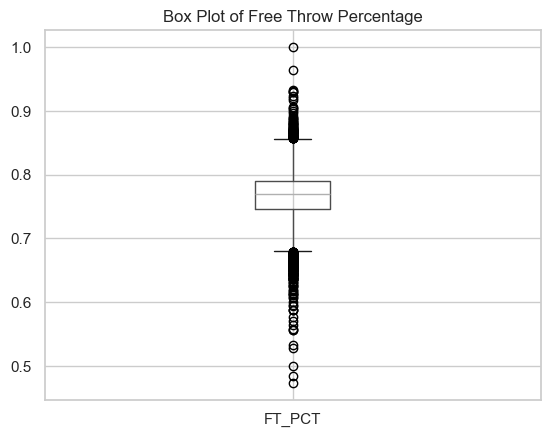

In [12]:
data.boxplot(column=['FT_PCT'])
plt.title('Box Plot of Free Throw Percentage')
plt.show()


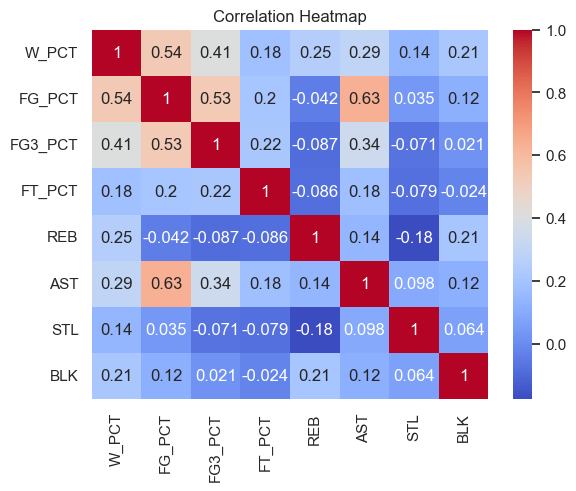

In [13]:
import seaborn as sns

# Selecting a few columns for simplicity
selected_columns = ['W_PCT', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK']
corr_matrix = data[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


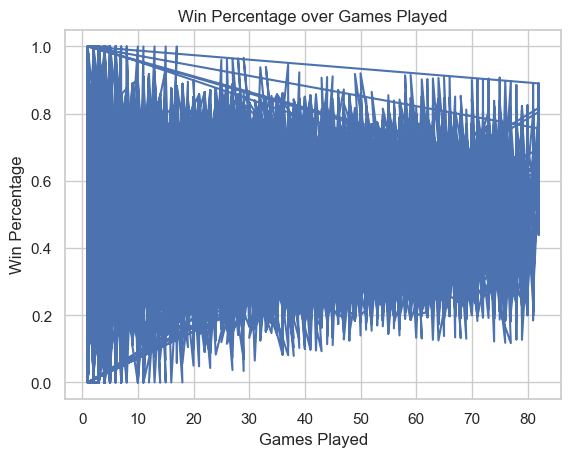

In [14]:
plt.plot(data['GP'], data['W_PCT'])
plt.xlabel('Games Played')
plt.ylabel('Win Percentage')
plt.title('Win Percentage over Games Played')
plt.show()


In [15]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("../../Data/dataset.sqlite")

# Execute the PRAGMA command to get table information
cursor = conn.execute("PRAGMA table_info('dataset_2012-24')")
columns = cursor.fetchall()

# Close the connection
conn.close()

# columns will be a list of tuples with the column information
for col in columns:
    print(col)


(0, 'index', 'INTEGER', 0, None, 0)
(1, 'TEAM_NAME', 'TEXT', 0, None, 0)
(2, 'GP', 'REAL', 0, None, 0)
(3, 'W', 'REAL', 0, None, 0)
(4, 'L', 'REAL', 0, None, 0)
(5, 'W_PCT', 'REAL', 0, None, 0)
(6, 'MIN', 'REAL', 0, None, 0)
(7, 'FGM', 'REAL', 0, None, 0)
(8, 'FGA', 'REAL', 0, None, 0)
(9, 'FG_PCT', 'REAL', 0, None, 0)
(10, 'FG3M', 'REAL', 0, None, 0)
(11, 'FG3A', 'REAL', 0, None, 0)
(12, 'FG3_PCT', 'REAL', 0, None, 0)
(13, 'FTM', 'REAL', 0, None, 0)
(14, 'FTA', 'REAL', 0, None, 0)
(15, 'FT_PCT', 'REAL', 0, None, 0)
(16, 'OREB', 'REAL', 0, None, 0)
(17, 'DREB', 'REAL', 0, None, 0)
(18, 'REB', 'REAL', 0, None, 0)
(19, 'AST', 'REAL', 0, None, 0)
(20, 'TOV', 'REAL', 0, None, 0)
(21, 'STL', 'REAL', 0, None, 0)
(22, 'BLK', 'REAL', 0, None, 0)
(23, 'BLKA', 'REAL', 0, None, 0)
(24, 'PF', 'REAL', 0, None, 0)
(25, 'PFD', 'REAL', 0, None, 0)
(26, 'PTS', 'REAL', 0, None, 0)
(27, 'PLUS_MINUS', 'REAL', 0, None, 0)
(28, 'GP_RANK', 'REAL', 0, None, 0)
(29, 'W_RANK', 'REAL', 0, None, 0)
(30, 'L_RANK',

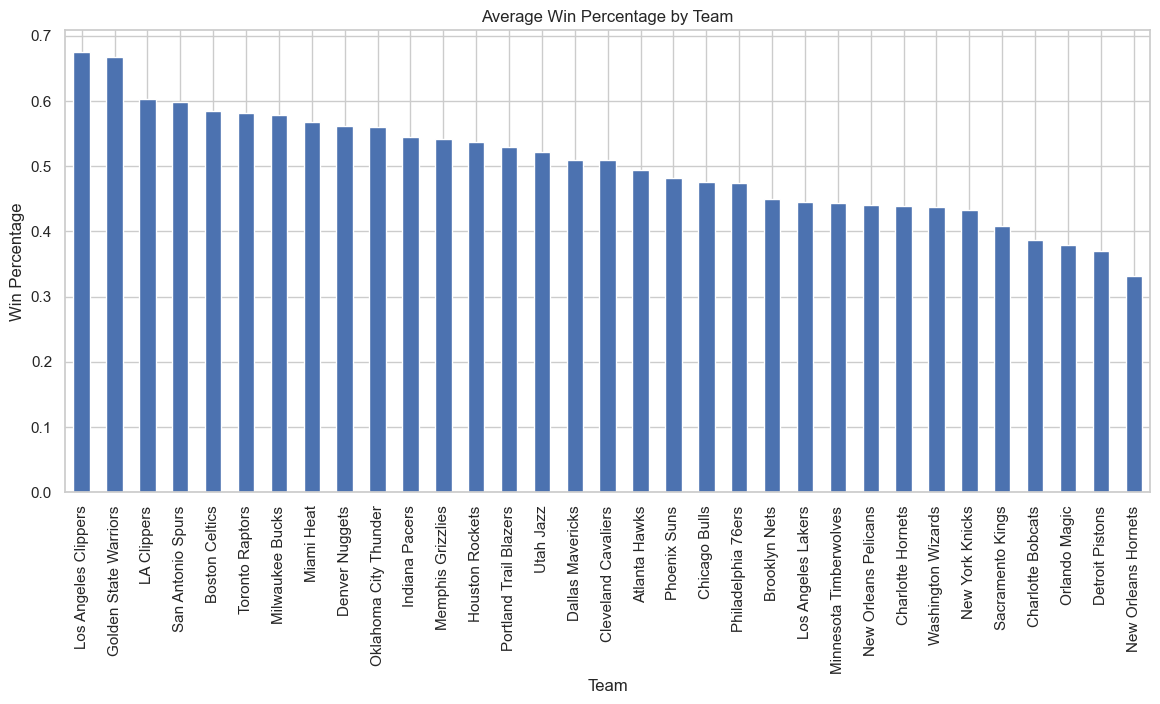

In [16]:
# Visualize which teams have the highest win percentages.
teams_win_pct = data.groupby('TEAM_NAME')['W_PCT'].mean().sort_values(ascending=False)
teams_win_pct.plot(kind='bar', figsize=(14,6))
plt.title('Average Win Percentage by Team')
plt.ylabel('Win Percentage')
plt.xlabel('Team')
plt.show()


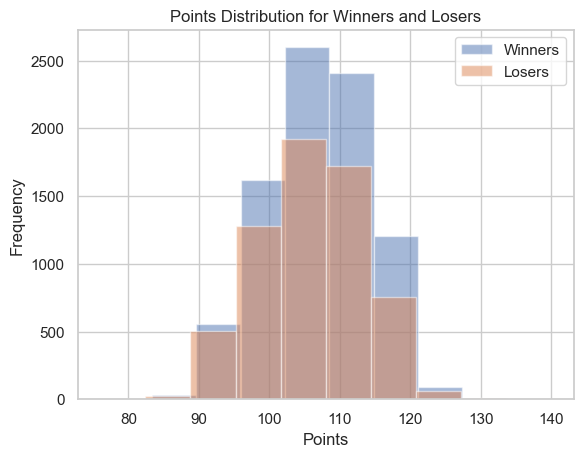

In [17]:
# Compare the distribution of points for winning and losing teams.
plt.hist(data[data['Home-Team-Win'] == 1]['PTS'], alpha=0.5, label='Winners')
plt.hist(data[data['Home-Team-Win'] == 0]['PTS'], alpha=0.5, label='Losers')
plt.title('Points Distribution for Winners and Losers')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend()
plt.show()


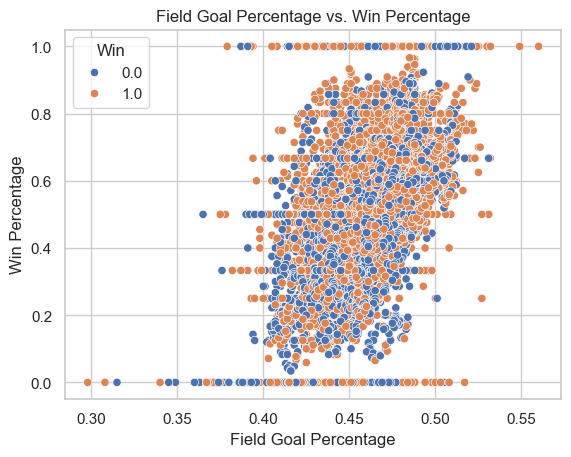

In [18]:
# Field Goal Percentage Impact on Winning
# Investigate how the field goal percentage correlates with winning matches.
sns.scatterplot(x='FG_PCT', y='W_PCT', data=data, hue='Home-Team-Win')
plt.title('Field Goal Percentage vs. Win Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Percentage')
plt.legend(title='Win')
plt.show()


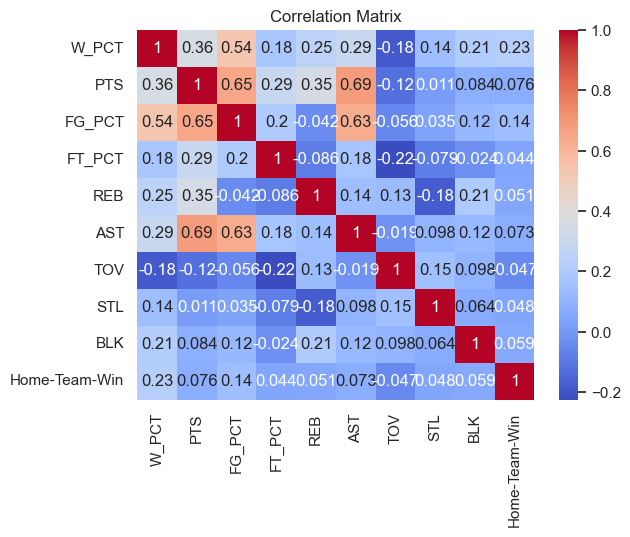

In [19]:
# A correlation heatmap can show how different features are related to the likelihood of winning.
# Select columns that are likely to influence the outcome
features = ['W_PCT', 'PTS', 'FG_PCT', 'FT_PCT', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'Home-Team-Win']
correlation = data[features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


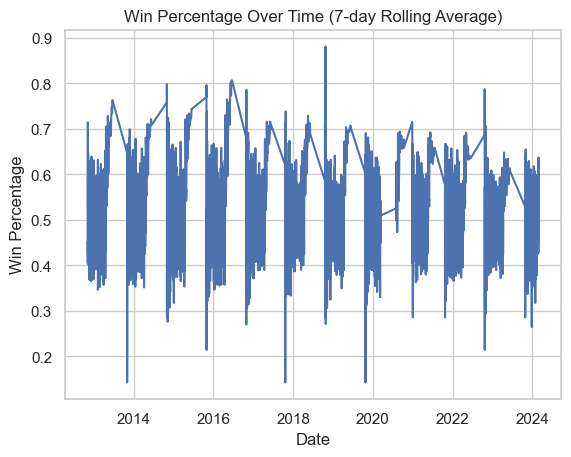

In [20]:
# Track performance metrics over time to see if there are trends that could influence predictions.
# This assumes you have a 'Date' column with datetime objects
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
plt.plot(data['Date'], data['W_PCT'].rolling(window=7).mean()) # 7-day rolling average
plt.title('Win Percentage Over Time (7-day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Win Percentage')
plt.show()


Accuracy: 63.4: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.40s/it]


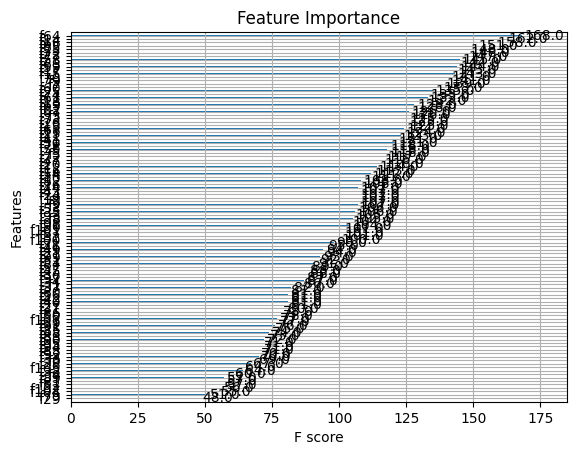

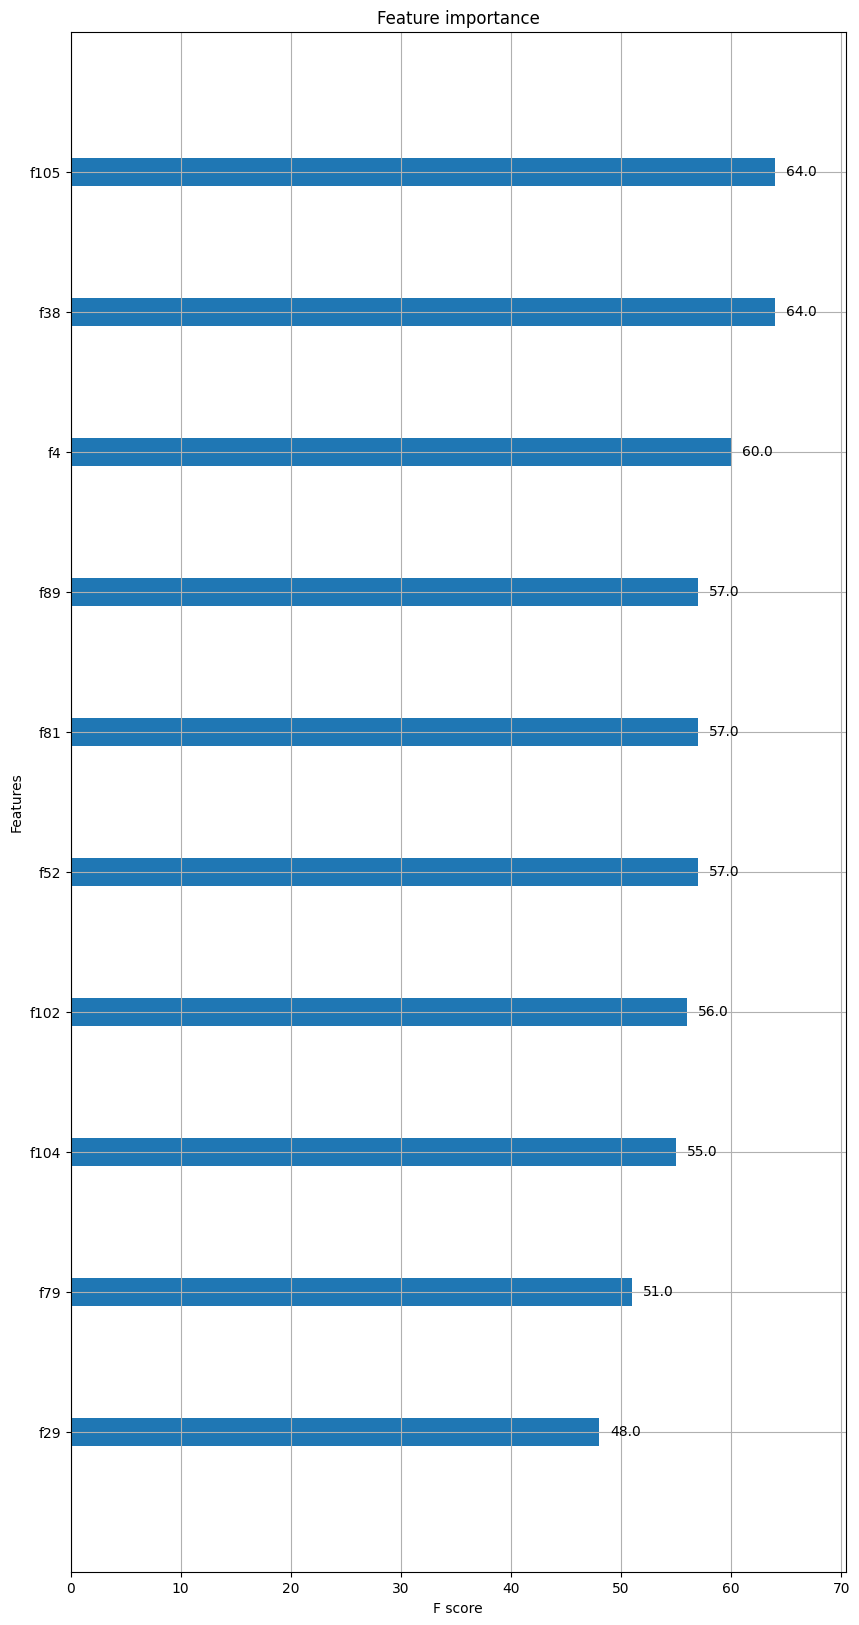

Ranked feature importance (by weight):
    Feature  Importance
64      f64       168.0
14      f14       162.0
66      f66       158.0
65      f65       151.0
75      f75       148.0
..      ...         ...
52      f52        57.0
102    f102        56.0
104    f104        55.0
79      f79        51.0
29      f29        48.0

[106 rows x 2 columns]

Top 10 features:
   Feature  Importance
64     f64       168.0
14     f14       162.0
66     f66       158.0
65     f65       151.0
75     f75       148.0
22     f22       148.0
77     f77       147.0
58     f58       145.0
59     f59       144.0
63     f63       144.0


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [6]:
# Visualize the feature importance from your XGBoost model.
# After fitting your model, you can plot feature importance

import sqlite3

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import warnings
# Filter out FutureWarnings from xgboost
warnings.filterwarnings("ignore", category=FutureWarning, module='xgboost.*')

dataset = "dataset_2012-24"
con = sqlite3.connect("../../Data/dataset.sqlite")
data = pd.read_sql_query(f"select * from \"{dataset}\"", con, index_col="index")
con.close()

margin = data['Home-Team-Win']
data.drop(['Score', 'Home-Team-Win', 'TEAM_NAME', 'Date', 'TEAM_NAME.1', 'Date.1', 'OU-Cover', 'OU'],
          axis=1, inplace=True)

data = data.values

data = data.astype(float)
acc_results = []


n_iterations=1
with tqdm(total=n_iterations) as progress_bar:
    for x in range(n_iterations):
        x_train, x_test, y_train, y_test = train_test_split(data, margin, test_size=.1)

        train = xgb.DMatrix(x_train, label=y_train)
        test = xgb.DMatrix(x_test, label=y_test)

        param = {
            "max_depth": 3,
            "learning_rate": 0.1,
            # "n_estimators": 200,
            "subsample": 0.6,
            "colsample_bytree": 0.6,
            "min_child_weight": 4,

            'eta': 0.01,
            # 'n_estimators': 300,
            'num_class': 2,
            'objective': 'multi:softprob',

        }
        epochs = 800

        model = xgb.train(param, train, epochs)
        predictions = model.predict(test)
        y = []

        for z in predictions:
            y.append(np.argmax(z))

        acc = round(accuracy_score(y_test, y) * 100, 1)
        # print(f"{acc}%")
        acc_results.append(acc)
        # only save results if they are the best so far
        best_acc = max(acc_results)
        if acc == best_acc:
            best_model = model
            model.save_model('../../Models/XGBoost_{}%_ML-4.json'.format(acc))

        progress_bar.set_description(f"Accuracy: {best_acc}")
        progress_bar.update(1)



xgb.plot_importance(best_model)
plt.title('Feature Importance')
plt.show()

f_importance = best_model.get_score(importance_type='weight')
sorted_importance = sorted(f_importance.items(), key=lambda item: item[1])

# Select the bottom 10%
bottom_10_percent = sorted_importance[:max(1, len(sorted_importance) // 10)]

# Plotting
fig, ax = plt.subplots(figsize=(10, 20))  # You can adjust the figure size here
xgb.plot_importance(dict(bottom_10_percent), ax=ax)
plt.show()

# Retrieve feature importance scores as a dictionary
# Use `importance_type='weight'`, 'gain', or 'cover' based on your preference
feature_importance = best_model.get_score(importance_type='weight')

# Convert the dictionary to a DataFrame for better visualization and sorting
feature_importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by the 'Importance' column in descending order
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print or display the ranked feature importance
print("Ranked feature importance (by weight):")
print(feature_importance_df)

# If you want to see the top 10 features
print("\nTop 10 features:")
print(feature_importance_df.head(10))

# If you want to save to a CSV for further inspection:
feature_importance_df.to_csv("feature_importance_ranking.csv", index=False)
feature_names = [f'f{i}' for i in range(data.shape[1])]
feature_importance_df['Feature'] = feature_importance_df['Feature'].replace({f'f{i}': col_name for i, col_name in enumerate(data.columns)})


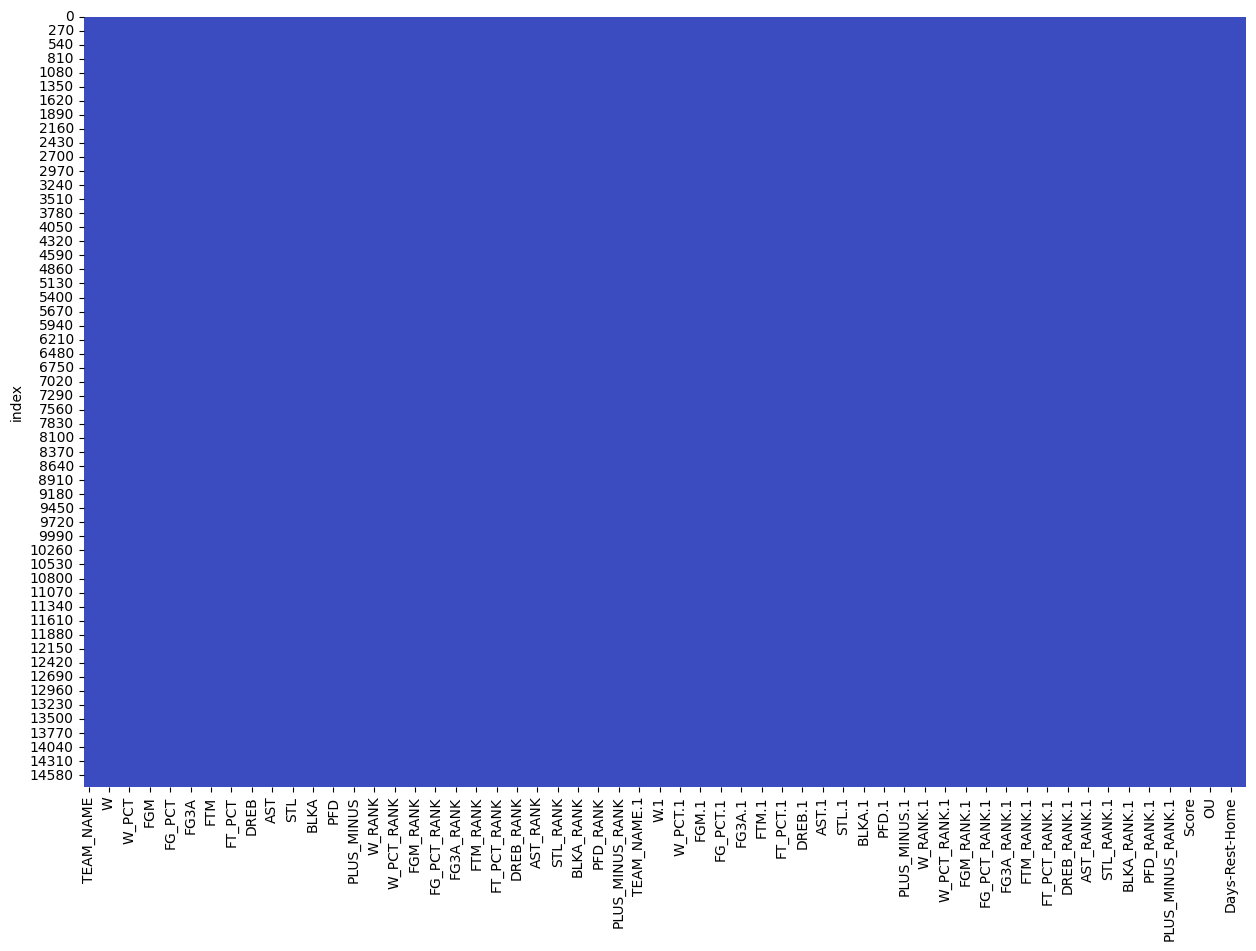

In [15]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
# Connecting to the SQLite database
dataset = "dataset_2012-24"

conn = sqlite3.connect("../../Data/dataset.sqlite")

# Replace 'your_table_name' with the actual table name
query = f"select * from \"{dataset}\""
df = pd.read_sql_query(query, conn, index_col="index")

# Closing the connection to the database
conn.close()

# Now you can use df to create your heatmap or other visualizations
present_data_mask = df.notnull()
plt.figure(figsize=(15, 10))
sns.heatmap(present_data_mask, cbar=False, cmap='coolwarm')
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.savefig('./missing_data_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()

In [1]:
# Retrieve feature importance scores as a dictionary
# Use `importance_type='weight'`, 'gain', or 'cover' based on your preference
feature_importance = best_model.get_score(importance_type='weight')

# Convert the dictionary to a DataFrame for better visualization and sorting
feature_importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by the 'Importance' column in descending order
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print or display the ranked feature importance
print("Ranked feature importance (by weight):")
print(feature_importance_df)

# If you want to see the top 10 features
print("\nTop 10 features:")
print(feature_importance_df.head(10))

# If you want to save to a CSV for further inspection:
feature_importance_df.to_csv("feature_importance_ranking.csv", index=False)
feature_names = [f'f{i}' for i in range(data.shape[1])]
feature_importance_df['Feature'] = feature_importance_df['Feature'].replace({f'f{i}': col_name for i, col_name in enumerate(data.columns)})


NameError: name 'best_model' is not defined

Accuracy: 65.0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.83s/it]


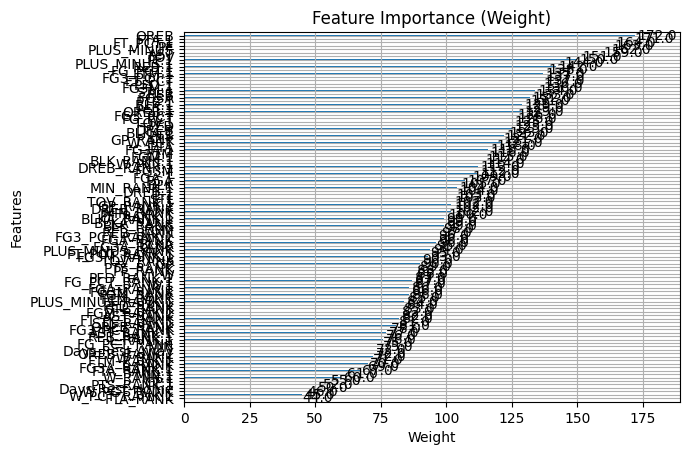

Ranked feature importance (by weight):
            Feature  Importance
14             OREB       172.0
64            FTA.1       171.0
65         FT_PCT.1       164.0
22               PF       163.0
25       PLUS_MINUS       162.0
..              ...         ...
102      PTS_RANK.1        52.0
104  Days-Rest-Home        50.0
29       W_PCT_RANK        46.0
81     W_PCT_RANK.1        45.0
38         FTA_RANK        44.0

[106 rows x 2 columns]


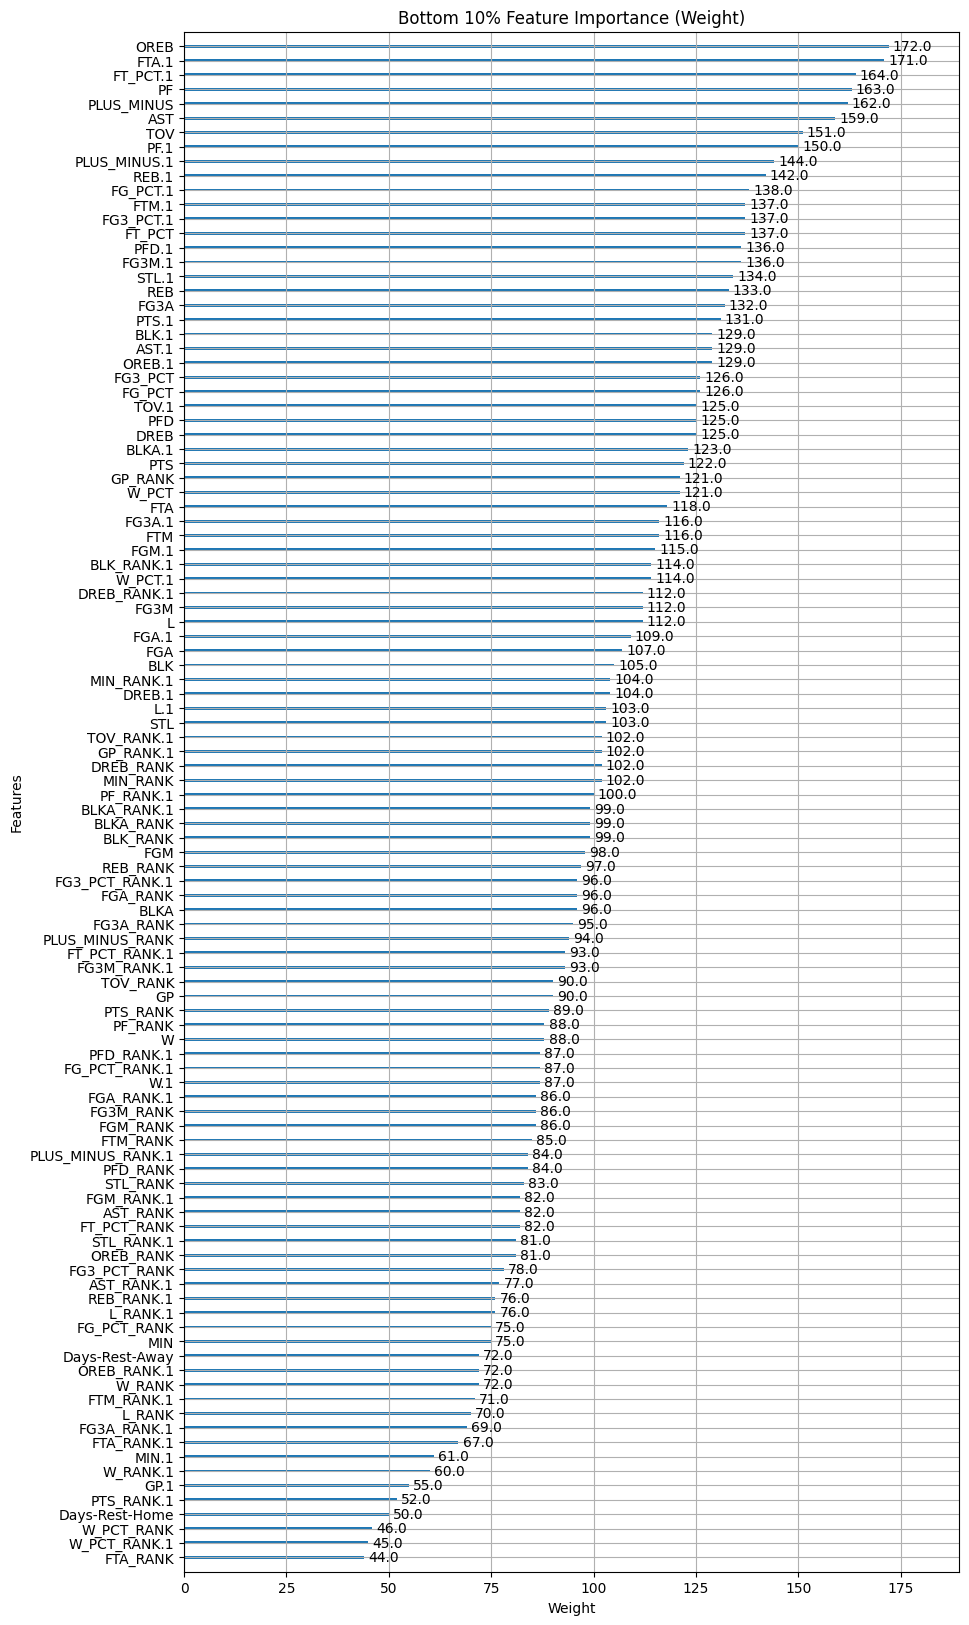

In [7]:
# Import necessary libraries
import sqlite3
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings

# Filter out FutureWarnings from xgboost
warnings.filterwarnings("ignore", category=FutureWarning, module='xgboost.*')

# Load the dataset
dataset = "dataset_2012-24"
con = sqlite3.connect("../../Data/dataset.sqlite")
data = pd.read_sql_query(f"select * from \"{dataset}\"", con, index_col="index")
con.close()

# Separate target variable and drop irrelevant columns
margin = data['Home-Team-Win']
drop_columns = ['Score', 'Home-Team-Win', 'TEAM_NAME', 'Date', 'TEAM_NAME.1', 'Date.1', 'OU-Cover', 'OU']
data.drop(drop_columns, axis=1, inplace=True)

# Convert DataFrame to numpy array and ensure it's in float format
feature_names = data.columns.tolist()
data = data.values
data = data.astype(float)

# Initialize variables to track accuracy and models
acc_results = []

n_iterations = 1  # Number of iterations for model training
with tqdm(total=n_iterations) as progress_bar:
    for x in range(n_iterations):
        # Split the data into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(data, margin, test_size=0.1)

        # Create DMatrix for XGBoost
        train = xgb.DMatrix(x_train, label=y_train, feature_names=feature_names)
        test = xgb.DMatrix(x_test, label=y_test, feature_names=feature_names)

        # Set up the model parameters
        param = {
            "max_depth": 3,
            "learning_rate": 0.1,
            "subsample": 0.6,
            "colsample_bytree": 0.6,
            "min_child_weight": 4,
            'eta': 0.01,
            'num_class': 2,
            'objective': 'multi:softprob'
        }
        epochs = 800  # Number of training iterations

        # Train the model
        model = xgb.train(param, train, epochs)
        predictions = model.predict(test)

        # Convert predictions to binary outcome
        y_pred = [np.argmax(pred) for pred in predictions]

        # Calculate accuracy
        acc = round(accuracy_score(y_test, y_pred) * 100, 1)
        acc_results.append(acc)
        
        # Save the best model
        best_acc = max(acc_results)
        if acc == best_acc:
            best_model = model
            model.save_model(f'../../Models/XGBoost_{acc}%_ML-4.json')

        # Update progress bar with the current best accuracy
        progress_bar.set_description(f"Accuracy: {best_acc}")
        progress_bar.update(1)

# Visualize feature importance using feature names
xgb.plot_importance(best_model, importance_type='weight', xlabel='Weight')
plt.title('Feature Importance (Weight)')
plt.show()

# Retrieve feature importance scores using feature names
feature_importance = best_model.get_score(importance_type='weight')

# Convert the dictionary to a DataFrame for better visualization and sorting
feature_importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by 'Importance' in descending order
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print or display the ranked feature importance
print("Ranked feature importance (by weight):")
print(feature_importance_df)

# Plot the bottom 10% of features
sorted_importance = feature_importance_df.sort_values(by='Importance', ascending=True)
bottom_10_percent = sorted_importance.head(max(1, len(sorted_importance) // 10))

# Plot the bottom 10% features using feature names
fig, ax = plt.subplots(figsize=(10, 20))  # Adjust figure size as needed
xgb.plot_importance(best_model, importance_type='weight', xlabel='Weight', ax=ax)
plt.title('Bottom 10% Feature Importance (Weight)')
plt.show()

# Save feature importance ranking to CSV for inspection
feature_importance_df.to_csv("feature_importance_ranking.csv", index=False)
